In this notebook we will generate investing insights by applying sentiment analysis on financial news headlines from [FINVIZ.com](https://finviz.com)

We will use 
* NLTK's built in Vader Sentiment Anlyzer which will rank piece of text as positive, negative or neutral using lexicon of positive and negative words
 **use method **polarity_scores** to get sentiment 
* textblob's sentiment function which gives polarity (-1: negative to +1:positive)
* Word embeddings (word2vec) 
* BERT embeddings

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib, requests
from bs4 import BeautifulSoup
%matplotlib inline 
plt.style.use('dark_background')

In [ ]:
from urllib.request import urlopen,Request

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
import spacy
from spacy import displacy
nlp=spacy.load('en_core_web_sm')

In [ ]:
doc=nlp("apple is tesla")

In [ ]:
doc.vector.shape

(96,)

In [ ]:
# Add to New words and values to vader lexicon
new_words = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
}
# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()

# Update the lexicon
# ... YOUR CODE FOR TASK 4 ...
vader.lexicon.update(new_words)

use webscraping to download headlines from HTML files of amazon, facebook, google and tesla and extract html_table in news_tables dictionary.  

In [ ]:
finviz_url="https://finviz.com/quote.ashx?t="

In [ ]:
tickers= ['AMZN','FB','GOOG','TSLA']

In [ ]:
news_tables={}
for ticker in tickers:
  url=finviz_url+ticker
  req=Request(url=url,headers={'user-agent':'my-app'})
  response=urlopen(req)
  #print(response)
  #
  html=BeautifulSoup(response,'html')
  #print(html)
  news_table=html.find(id="news-table")
  news_tables[ticker]=news_table

Make pandas dataframe to store ticker,date, time and news 

In [ ]:
parsed_data=[]
for ticker, news_table in news_tables.items():
  for row in news_table.findAll('tr'):
    #print(row)
    
    title=row.a.text
    date_data=row.td.text.split(" ")
    
    if len(date_data)==1:
      time=date_data[0]
    else:
      date=date_data[0]
      time=date_data[1]
    parsed_data.append([ticker,date,time,title])
print(parsed_data)



[['AMZN', 'Sep-10-20', '08:11AM\xa0\xa0', 'Dow Jones Futures Fall 125 Points After Big Stock Market Rally; Apple, Amazon, Tesla Extend Rebounds, While RH Surges 17%'], ['AMZN', 'Sep-10-20', '07:21AM\xa0\xa0', 'Stock market news live updates: Stock futures fall, setting up another session of selling'], ['AMZN', 'Sep-10-20', '07:21AM\xa0\xa0', 'Buffett Just Bought the Hottest Cloud IPO of 2020 -- or Did He?'], ['AMZN', 'Sep-10-20', '07:00AM\xa0\xa0', 'Influencers with Andy Serwer: Reed Hastings'], ['AMZN', 'Sep-10-20', '07:00AM\xa0\xa0', '2 Top Growth Stocks to Buy Right Now'], ['AMZN', 'Sep-10-20', '06:44AM\xa0\xa0', "India's Reliance Industries Offers Amazon a $20 Billion Stake"], ['AMZN', 'Sep-10-20', '06:37AM\xa0\xa0', 'Ambanis Reliance to Offer $20 Billion Stake in Retail Arm to Amazon'], ['AMZN', 'Sep-10-20', '06:30AM\xa0\xa0', 'The Tech Rout Makes It a Good Time to Trade Amazon Options'], ['AMZN', 'Sep-10-20', '06:09AM\xa0\xa0', 'Where to Invest $5,000 Right Now'], ['AMZN', 'Sep-1

In [ ]:
df=pd.DataFrame(parsed_data,columns=['ticker','date','time','title'])

In [ ]:
print(df.head())

  ticker  ...                                              title
0   AMZN  ...  Dow Jones Futures Fall 125 Points After Big St...
1   AMZN  ...  Stock market news live updates: Stock futures ...
2   AMZN  ...  Buffett Just Bought the Hottest Cloud IPO of 2...
3   AMZN  ...        Influencers with Andy Serwer: Reed Hastings
4   AMZN  ...               2 Top Growth Stocks to Buy Right Now

[5 rows x 4 columns]


In [ ]:
df.tail()

,ticker,date,time,title
395,TSLA,Sep-08-20,12:05PM,"Dow Jones Plunges 600 Points, As Tech Sell-Off..."
396,TSLA,Sep-08-20,12:00PM,Nikola Teams Up With GM In Game-Changing $2 Bi...
397,TSLA,Sep-08-20,11:57AM,"US STOCKS-Nasdaq slides as tech rout deepens, ..."
398,TSLA,Sep-08-20,11:56AM,GM and Nikola Are a Match Made in Tesla Hell
399,TSLA,Sep-08-20,11:53AM,INSIGHT-Ford's incoming CEO wants the U.S. aut...


In [ ]:
vader=SentimentIntensityAnalyzer()

In [ ]:
pos=lambda title:vader.polarity_scores(title)['pos']
neg=lambda title:vader.polarity_scores(title)['neg']
neu=lambda title:vader.polarity_scores(title)['neu']
compound=lambda title:vader.polarity_scores(title)['compound']
polarity=lambda title:TextBlob(title).sentiment.polarity
df['pos']=df['title'].apply(pos)
df['neg']=df['title'].apply(neg)
df['neu']=df['title'].apply(neu)
df['compound']=df['title'].apply(compound)
df['polarity']=df['title'].apply(polarity)

In [ ]:
df.head()

,ticker,date,time,title,pos,neg,neu,compound,polarity
0,AMZN,Sep-10-20,08:11AM,Dow Jones Futures Fall 125 Points After Big St...,0.159,0.0,0.841,0.3400,0.000000
1,AMZN,Sep-10-20,07:21AM,Stock market news live updates: Stock futures ...,0.000,0.0,1.000,0.0000,0.136364
2,AMZN,Sep-10-20,07:21AM,Buffett Just Bought the Hottest Cloud IPO of 2...,0.000,0.0,1.000,0.0000,0.000000
3,AMZN,Sep-10-20,07:00AM,Influencers with Andy Serwer: Reed Hastings,0.000,0.0,1.000,0.0000,0.000000
4,AMZN,Sep-10-20,07:00AM,2 Top Growth Stocks to Buy Right Now,0.468,0.0,0.532,0.5267,0.392857


In [ ]:
df['title'][0]

'Dow Jones Futures Fall 125 Points After Big Stock Market Rally; Apple, Amazon, Tesla Extend Rebounds, While RH Surges 17%'

In [ ]:
df['date']=pd.to_datetime(df['date']).dt.date

In [ ]:
df.head()

,ticker,date,time,title,pos,neg,neu,compound,polarity
0,AMZN,2020-09-10,08:11AM,Dow Jones Futures Fall 125 Points After Big St...,0.159,0.0,0.841,0.3400,0.000000
1,AMZN,2020-09-10,07:21AM,Stock market news live updates: Stock futures ...,0.000,0.0,1.000,0.0000,0.136364
2,AMZN,2020-09-10,07:21AM,Buffett Just Bought the Hottest Cloud IPO of 2...,0.000,0.0,1.000,0.0000,0.000000
3,AMZN,2020-09-10,07:00AM,Influencers with Andy Serwer: Reed Hastings,0.000,0.0,1.000,0.0000,0.000000
4,AMZN,2020-09-10,07:00AM,2 Top Growth Stocks to Buy Right Now,0.468,0.0,0.532,0.5267,0.392857


In [ ]:
mean_df=df.groupby(['ticker','date']).mean()

In [ ]:
mean_df.shape

(22, 5)

In [ ]:
mean_df.head()

pos       neg       neu  compound  polarity
ticker date                                                        
AMZN   2020-09-08  0.089190  0.079500  0.831310  0.009183  0.080085
       2020-09-09  0.083457  0.019109  0.897435  0.112578  0.107985
       2020-09-10  0.131083  0.000000  0.868917  0.177975  0.151245
FB     2020-09-03  0.064156  0.089844  0.846000 -0.039538  0.012058
       2020-09-04  0.073067  0.075333  0.851600 -0.015100  0.093333

In [ ]:
mean_df.tail()

pos       neg       neu  compound  polarity
ticker date                                                        
GOOG   2020-09-09  0.142391  0.019087  0.838522  0.213617  0.157378
       2020-09-10  0.137125  0.046625  0.816250  0.154850  0.062500
TSLA   2020-09-08  0.049676  0.131973  0.818351 -0.121459 -0.050225
       2020-09-09  0.059818  0.063127  0.877055  0.004915  0.047848
       2020-09-10  0.109625  0.058250  0.832125  0.107075  0.179545

In [ ]:
mean_df=mean_df.unstack()

In [ ]:
mean_df.head()

pos                        ...   polarity                      
date   2020-09-03 2020-09-04 2020-09-05  ... 2020-09-08 2020-09-09 2020-09-10
ticker                                   ...                                 
AMZN          NaN        NaN        NaN  ...   0.080085   0.107985   0.151245
FB       0.064156   0.073067     0.0795  ...   0.011178   0.104167   0.039881
GOOG     0.219000   0.068350     0.0360  ...   0.058641   0.157378   0.062500
TSLA          NaN        NaN        NaN  ...  -0.050225   0.047848   0.179545

[4 rows x 40 columns]

In [ ]:
mean_df=mean_df.xs('compound',axis='columns').transpose()

In [ ]:
mean_df.head()

ticker,AMZN,FB,GOOG,TSLA
date,,,,
2020-09-03,NaN,-0.039538,0.318200,NaN
2020-09-04,NaN,-0.015100,0.059010,NaN
2020-09-05,NaN,-0.008200,-0.013040,NaN
2020-09-06,NaN,0.200950,0.200950,NaN
2020-09-07,NaN,-0.098667,0.072773,NaN


In [ ]:
mean_df.tail()

ticker,AMZN,FB,GOOG,TSLA
date,,,,
2020-09-06,NaN,0.200950,0.200950,NaN
2020-09-07,NaN,-0.098667,0.072773,NaN
2020-09-08,0.009183,-0.021387,-0.003767,-0.121459
2020-09-09,0.112578,0.054992,0.213617,0.004915
2020-09-10,0.177975,-0.086900,0.154850,0.107075


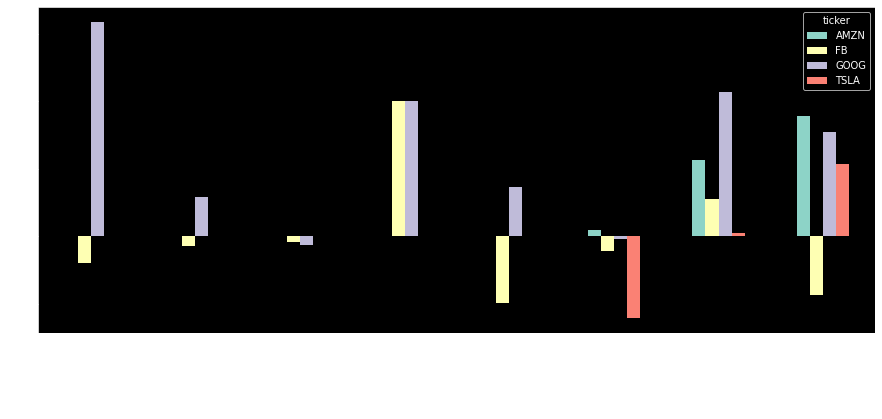

In [ ]:
#plt.figure(figsize=(20,8))
mean_df.plot(kind='bar',figsize=(15,6))
plt.show()

In [ ]:
#Embeddings


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-09-10 12:25:05--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-09-10 12:25:06--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-09-10 12:25:06--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
ls

glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
glove.6B.200d.txt  glove.6B.50d.txt   sample_data/


In [ ]:
glove_data_file='glove.6B.100d.txt'

In [ ]:
import pandas as pd
import csv
words=pd.read_table(glove_data_file,sep=" ", index_col=0,header=None,quoting=csv.QUOTE_NONE)

In [ ]:
words.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
the,-0.038194,-0.244870,0.72812,-0.399610,0.083172,0.043953,-0.391410,0.334400,-0.57545,0.087459,0.287870,-0.06731,0.30906,-0.26384,-0.13231,-0.20757,0.33395,-0.338480,-0.31743,-0.48336,0.146400,-0.373040,0.34577,0.052041,0.449460,-0.469710,0.026280,-0.54155,-0.15518,-0.141070,-0.039722,0.28277,0.14393,0.234640,-0.31021,0.086173,0.20397,0.52624,0.171640,-0.082378,...,-0.24978,0.92136,0.034514,0.46745,1.10790,-0.193580,-0.074575,0.233530,-0.052062,-0.220440,0.057162,-0.15806,-0.307980,-0.416250,0.379720,0.150060,-0.532120,-0.205500,-1.25260,0.071624,0.70565,0.497440,-0.42063,0.26148,-1.5380,-0.30223,-0.073438,-0.283120,0.371040,-0.25217,0.016215,-0.017099,-0.389840,0.87424,-0.72569,-0.51058,-0.520280,-0.14590,0.82780,0.270620
",",-0.107670,0.110530,0.59812,-0.543610,0.673960,0.106630,0.038867,0.354810,0.06351,-0.094189,0.157860,-0.81665,0.14172,0.21939,0.58505,-0.52158,0.22783,-0.166420,-0.68228,0.35870,0.425680,0.190210,0.91963,0.575550,0.461850,0.423630,-0.095399,-0.42749,-0.16567,-0.056842,-0.295950,0.26037,-0.26606,-0.070404,-0.27662,0.158210,0.69825,0.43081,0.279520,-0.454370,...,-0.22080,0.18669,0.131770,0.15117,0.71310,-0.352150,0.913480,0.617830,0.709920,0.239550,-0.145710,-0.37859,-0.045959,-0.473680,0.238500,0.205360,-0.189960,0.325070,-1.11120,-0.363410,0.98679,-0.084776,-0.54008,0.11726,-1.0194,-0.24424,0.127710,0.013884,0.080374,-0.35414,0.349510,-0.722600,0.375490,0.44410,-0.99059,0.61214,-0.351110,-0.83155,0.45293,0.082577
.,-0.339790,0.209410,0.46348,-0.647920,-0.383770,0.038034,0.171270,0.159780,0.46619,-0.019169,0.414790,-0.34349,0.26872,0.04464,0.42131,-0.41032,0.15459,0.022239,-0.64653,0.25256,0.043136,-0.194450,0.46516,0.456510,0.685880,0.091295,0.218750,-0.70351,0.16785,-0.350790,-0.126340,0.66384,-0.25820,0.036542,-0.13605,0.402530,0.14289,0.38132,-0.122830,-0.458860,...,-0.55262,0.65000,0.086426,0.39012,1.06320,-0.353790,0.483280,0.346000,0.841740,0.098707,-0.242130,-0.27053,0.045287,-0.401470,0.113950,0.006223,0.036673,0.018518,-1.02130,-0.208060,0.64072,-0.068763,-0.58635,0.33476,-1.1432,-0.11480,-0.250910,-0.459070,-0.096819,-0.17946,-0.063351,-0.674120,-0.068895,0.53604,-0.87773,0.31802,-0.392420,-0.23394,0.47298,-0.028803
of,-0.152900,-0.242790,0.89837,0.169960,0.535160,0.487840,-0.588260,-0.179820,-1.35810,0.425410,0.153770,0.24215,0.13474,0.41193,0.67043,-0.56418,0.42985,-0.012183,-0.11677,0.31781,0.054177,-0.054273,0.35516,-0.302410,0.314340,-0.338460,0.717150,-0.26855,-0.15837,-0.474670,0.051581,-0.33252,0.15003,-0.129900,-0.54617,-0.378430,0.64261,0.82187,-0.080006,0.078479,...,0.04885,0.78267,0.384970,0.42097,0.67882,0.103370,0.632800,-0.026595,0.586470,-0.443320,0.330570,-0.12022,-0.556450,0.073611,0.209150,0.433950,-0.012761,0.089874,-1.79910,0.084808,0.77112,0.631050,-0.90685,0.60326,-1.7515,0.18596,-0.506870,-0.702030,0.665780,-0.81304,0.187120,-0.018488,-0.267570,0.72700,-0.59363,-0.34839,-0.560940,-0.59100,1.00390,0.206640
to,-0.189700,0.050024,0.19084,-0.049184,-0.089737,0.210060,-0.549520,0.098377,-0.20135,0.342410,-0.092677,0.16100,-0.13268,-0.28160,0.18737,-0.42959,0.96039,0.139720,-1.07810,0.40518,0.505390,-0.550640,0.48440,0.380440,-0.002906,-0.349420,-0.099696,-0.78368,1.03630,-0.231400,-0.471210,0.57126,-0.21454,0.359580,-0.48319,1.087500,0.28524,0.12447,-0.039248,-0.076732,...,-0.34780,0.51621,-0.433870,0.36852,0.74573,0.072102,0.279310,0.925690,-0.050336,-0.858560,-0.135800,-0.92551,-0.339910,-1.039400,-0.067203,-0.213790,-0.476900,0.213770,-0.84008,0.052536,0.59298,0.296040,-0.67644,0.13916,-1.5504,-0.20765,0.722200,0.520560,-0.076221,-0.15194,-0.131340,0.058617,-0.318690,-0.61419,-0.62393,-0.41548,-0.038175,-0.39804,0.47647,-0.159830


In [ ]:
text="I am happy"

In [ ]:
!pip install gensim

In [ ]:
import gensim.downloader as api

In [ ]:
from gensim.models.word2vec import Word2Vec